In [47]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math
import requests
import json
from pandas.io.json import json_normalize
import matplotlib.dates as mdates
from datetime import date, timedelta


In [105]:
url = 'https://api.collection.cooperhewitt.org/rest/?method=cooperhewitt.exhibitions.getList&access_token=729cca8ffeb40cd2e725f5301e034134'
resp = requests.request('GET', url)
exhibition = json.loads(resp.text)
exhibition = pd.json_normalize(exhibition['exhibitions'])
exhibition['date_start'] = pd.to_datetime(exhibition['date_start'])
exhibition['date_end'].replace('0000-00-00', '2020-12-30', inplace=True)
exhibition['date_end'] = pd.to_datetime(exhibition['date_end'])
##filtering by the pens dates
exhibition= exhibition[exhibition['date_start'] >= '2014-10-01']
# exhibition.set_index(keys= ['date_start', 'title'], inplace=True)

db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

pensActivity = pd.read_sql('SELECT * FROM PensActivity', con=db_connection)
pensActivity['created'] = pd.to_datetime(pensActivity['created'], unit='s')
pensActivity['lastmodified'] = pd.to_datetime(pensActivity['lastmodified'], unit='s')
pensActivity['created'].replace(0, np.nan, inplace=True)
pensActivity['lastmodified'].replace(0, np.nan, inplace=True)
pensActivity['notes'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
pensActivity['notes'] = pensActivity['notes'].astype('category')
pensActivity.sort_values(by='created', inplace=True)

pensCheckouts = pd.read_sql('SELECT * FROM PensCheckouts', con=db_connection)
pensCheckouts['start'] = pd.to_datetime(pensCheckouts['start'], unit='s')
pensCheckouts['start'].replace(0, np.nan, inplace=True)
pensCheckouts['end'].replace(0, np.nan, inplace=True)
pensCheckouts['end'] = pd.to_datetime(pensCheckouts['end'], unit='s')
pensCheckouts['start_ip'].replace(0, np.nan, inplace=True)
pensCheckouts['end_ip'].replace(0, np.nan, inplace=True)
pensCheckouts['start_ip'] = pensCheckouts['start_ip'].astype('category')
pensCheckouts['end_ip'] = pensCheckouts['end_ip'].astype('category')
pensCheckouts.set_index('id', inplace=True)
pensCheckouts.sort_index(inplace=True)
###DROPED COLUMNS####
pensCheckouts.drop(['start_ip', 'end_ip'], axis=1, inplace=True)

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)

In [4]:
# checkout_monthly_value = pensCheckouts['start'].groupby(pensCheckouts.start.dt.to_period("M")).agg('count')
# checkout_monthly_value
# activity_monthly_value = pensActivity['created'].groupby(pensActivity.created.dt.to_period("M")).agg('count')
# activity_monthly_value

# join_monthly_value = pd.concat([checkout_monthly_value, activity_monthly_value], axis=1)
# join_monthly_value = join_monthly_value.rename({'start': 'checkout_counts', 'created': 'activity_counts'}, axis=1)
# join_monthly_value.reset_index(inplace=True)
# join_monthly_value =join_monthly_value.rename({"index": "date_start"}, axis=1)
# join_monthly_value['date_start'] = join_monthly_value['date_start'].astype('str')
# join_monthly_value

In [5]:
# exhibition['date_start'] = pd.DatetimeIndex(exhibition['date_start']).to_period("M")
# exhibition_date = exhibition[['date_start', 'title']]
# # exhibition_date.set_index(['date_start'], inplace=True)
# exhibition_date = exhibition_date[exhibition_date['date_start'] >= '2014-10-01']
# exhibition_date.info()
# exhibition_date['date_start'] = exhibition_date['date_start'].astype('str')
# exhibition_date

In [6]:
# exhibition_item_collect = pd.merge(exhibition_date, join_monthly_value, on= 'date_start', right_index=True, left_index=True)
# exhibition_item_collect.sort_values(by='date_start')
# exhibition_item_collect.set_index(keys=['date_start', 'title'])

In [7]:
# exhibition_activity = exhibition_date.merge(join_monthly_value, how='inner', on='date_start')
# exhibition_activity.set_index(keys=['date_start', 'title'], inplace=True)
# duplicates_activity = exhibition_activity.duplicated('activity_counts')
# exhibition_activity.loc[duplicates_activity, ['checkout_counts','activity_counts']] = np.NaN
# exhibition_activity

In [8]:
# exhibition_activity.plot(use_index='date_start')

## relationship between pens checkout and exhibitions 

In [9]:
exhibition_date = exhibition[exhibition['date_start'] >= '2014-10-01']

In [10]:
def get_checkout_counts(exhibit):
    start= exhibit['date_start']
    end= exhibit['date_end']
    pensCheckouts_count = pensCheckouts[(pensCheckouts['start'] >=start) & (pensCheckouts['start'] <= end)]
    return pensCheckouts_count['pen_id'].count()

In [11]:
exhibition_date['count'] = exhibition_date.apply(get_checkout_counts, axis=1)
exhibition_date

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,url,title,text,date_start,date_end,is_active,count
0,2318802364,https://collection.cooperhewitt.org/exhibition...,Willi Smith: Street Couture,\r\nDuring his twenty-year career Willi Smith ...,2020-03-13,2020-12-30,1,36
1,2318802212,https://collection.cooperhewitt.org/exhibition...,Contemporary Muslim Fashions,Contemporary Muslim Fashions is the first majo...,2020-02-28,2020-12-30,1,1499
2,1159161457,https://collection.cooperhewitt.org/exhibition...,Botanical Expressions,"\r\nAt the turn of the 20th century, the inter...",2019-12-07,2020-12-30,1,26222
3,2318800172,https://collection.cooperhewitt.org/exhibition...,Herbert Bayer: Bauhaus Master,"Herbert Bayer (American, born Austria, active ...",2019-11-16,2020-12-30,1,32063
4,1159161451,https://collection.cooperhewitt.org/exhibition...,After Icebergs,"In the summer of 1859, Frederic Edwin Church (...",2019-11-16,2020-12-30,1,32063
5,2318800145,https://collection.cooperhewitt.org/exhibition...,Nature by Design: Cochineal,"American cochineal [Dactylopius coccus], a sma...",2019-11-16,2020-12-30,1,32063
6,2318800018,https://collection.cooperhewitt.org/exhibition...,Face Values: Exploring Artificial Intelligence,Computers now complete many tasks that formerl...,2019-09-20,2020-12-30,1,45624
7,2318799994,https://collection.cooperhewitt.org/exhibition...,Collection Selects: Wyss Institute,The Wyss Institute for Biologically Inspired E...,2019-07-12,2020-12-30,1,70374
8,1159161445,https://collection.cooperhewitt.org/exhibition...,Plastics,\r\nNature By Design: Plastics\r\n\r\nFrom mol...,2019-06-08,2020-12-30,1,80863
9,1159161455,https://collection.cooperhewitt.org/exhibition...,Botanical Lessons,\r\nBotanical Lessons explores the 19th-centur...,2019-06-08,2020-12-30,0,80863


In [12]:
exhibition_checkouts = exhibition_date[['date_start', 'date_end', 'title', 'id', 'count' ]]
exhibition_checkouts.reset_index(inplace=True)
exhibition_checkouts.drop(['index'], axis=1, inplace=True)

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
exhibition_checkouts

,date_start,date_end,title,id,count
0,2020-03-13,2020-12-30,Willi Smith: Street Couture,2318802364,36
1,2020-02-28,2020-12-30,Contemporary Muslim Fashions,2318802212,1499
2,2019-12-07,2020-12-30,Botanical Expressions,1159161457,26222
3,2019-11-16,2020-12-30,Herbert Bayer: Bauhaus Master,2318800172,32063
4,2019-11-16,2020-12-30,After Icebergs,1159161451,32063
5,2019-11-16,2020-12-30,Nature by Design: Cochineal,2318800145,32063
6,2019-09-20,2020-12-30,Face Values: Exploring Artificial Intelligence,2318800018,45624
7,2019-07-12,2020-12-30,Collection Selects: Wyss Institute,2318799994,70374
8,2019-06-08,2020-12-30,Plastics,1159161445,80863
9,2019-06-08,2020-12-30,Botanical Lessons,1159161455,80863


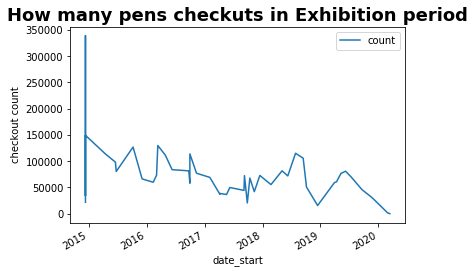

In [14]:
exhibition_checkouts.plot(x='date_start', y='count')
plt.title('How many pens checkuts in Exhibition period', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('checkout count')
plt.legend()
# plt.savefig('exhibition_checkouts.png', dpi=300)

#exhibition that started before 2018 might ended in 2018 - the number are misleading

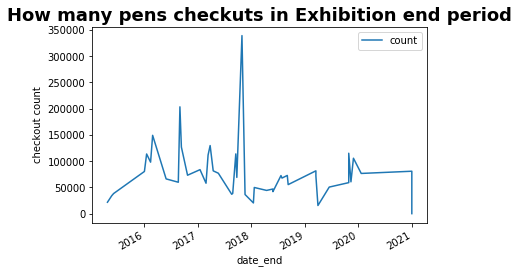

In [15]:
exhibition_checkouts.plot(x='date_end', y='count')
plt.title('How many pens checkuts in Exhibition end period', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('checkout count')
plt.legend()

In [16]:
exhibition_checkouts['count'].nlargest()
#some exhibitions here lasted over two years

48    339306
49    203565
50    149259
40    129767
44    126914
Name: count, dtype: int64

In [17]:
exhibition_checkouts['range_time'] = exhibition_checkouts['date_end'] - exhibition_checkouts['date_start']
exhibition_checkouts

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date_start,date_end,title,id,count,range_time
0,2020-03-13,2020-12-30,Willi Smith: Street Couture,2318802364,36,292 days
1,2020-02-28,2020-12-30,Contemporary Muslim Fashions,2318802212,1499,306 days
2,2019-12-07,2020-12-30,Botanical Expressions,1159161457,26222,389 days
3,2019-11-16,2020-12-30,Herbert Bayer: Bauhaus Master,2318800172,32063,410 days
4,2019-11-16,2020-12-30,After Icebergs,1159161451,32063,410 days
5,2019-11-16,2020-12-30,Nature by Design: Cochineal,2318800145,32063,410 days
6,2019-09-20,2020-12-30,Face Values: Exploring Artificial Intelligence,2318800018,45624,467 days
7,2019-07-12,2020-12-30,Collection Selects: Wyss Institute,2318799994,70374,537 days
8,2019-06-08,2020-12-30,Plastics,1159161445,80863,571 days
9,2019-06-08,2020-12-30,Botanical Lessons,1159161455,80863,571 days


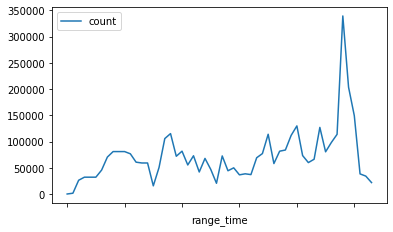

In [18]:
exhibition_checkouts.plot(x='range_time', y='count')

In [19]:
exhibition_checkouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   date_start  54 non-null     datetime64[ns] 
 1   date_end    54 non-null     datetime64[ns] 
 2   title       54 non-null     object         
 3   id          54 non-null     object         
 4   count       54 non-null     int64          
 5   range_time  54 non-null     timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), object(2), timedelta64[ns](1)
memory usage: 2.7+ KB


In [20]:
exhibition_checkouts['countTwo'] = exhibition_checkouts['count'].astype('object')

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
exhibition_checkouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   date_start  54 non-null     datetime64[ns] 
 1   date_end    54 non-null     datetime64[ns] 
 2   title       54 non-null     object         
 3   id          54 non-null     object         
 4   count       54 non-null     int64          
 5   range_time  54 non-null     timedelta64[ns]
 6   countTwo    54 non-null     object         
dtypes: datetime64[ns](2), int64(1), object(3), timedelta64[ns](1)
memory usage: 3.1+ KB


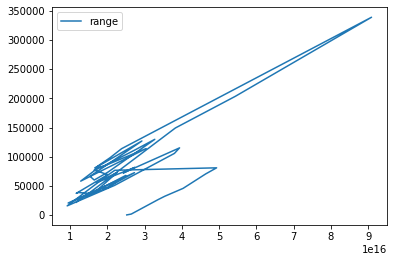

In [22]:
plt.plot(exhibition_checkouts.range_time, exhibition_checkouts.countTwo, label='range')
# plt.xticks(exhibition_checkouts[::10])
plt.legend()
plt.show()

In [23]:
exhibition_title = exhibition_checkouts.set_index(['title']).transpose()
exhibition_title

title,Willi Smith: Street Couture,Contemporary Muslim Fashions,Botanical Expressions,Herbert Bayer: Bauhaus Master,After Icebergs,Nature by Design: Cochineal,Face Values: Exploring Artificial Intelligence,Collection Selects: Wyss Institute,Plastics,Botanical Lessons,Bathing Beautiful,Nature—Cooper Hewitt Design Triennial,Paisley,Embroidered and Embellished,Katagami,The Road Ahead: Reimagining Mobility,Rebeca Méndez Selects,Process Lab: Scholten & Baijings,Iridescence,Color Decoded: The Textiles of Richard Landis,Saturated: The Allure and Science of Color,Bob Greenberg Selects,Access+Ability,Jewelry of Ideas: Gifts from the Susan Grant Lewin Collection,"Hear, See, Play: Designing with Sound",...,Esperanza Spalding Selects,Making | Breaking: New Arrivals,Jeweled Splendors of the Art Deco Era: The Prince and Princess Sadruddin Aga Khan Collection,The Jazz Age: American Style in the 1920s,The World of Radio,Ellen DeGeneres Selects,Process Lab: Citizen Design,By the People: Designing a Better America,Scraps,Fragile Beasts,Energizing the Everyday: Gifts From the George R. Kravis II Collection,Passion for the Exotic: Louis Comfort Tiffany and Lockwood de Forest,Thom Browne Selects,Beauty—Cooper Hewitt Design Triennial,Making Design: Recent Acquisitions,Pixar: The Design of Story,Provocations: The Architecture and Design of Heatherwick Studio,David Adjaye Selects: Works from the Permanent Collection,How Posters Work,Hewitt Sisters Collect,Making Design,"Passion for the Exotic: Lockwood de Forest, Frederic Church",Maira Kalman Selects,Tools: Extending Our Reach,Beautiful Users
date_start,2020-03-13 00:00:00,2020-02-28 00:00:00,2019-12-07 00:00:00,2019-11-16 00:00:00,2019-11-16 00:00:00,2019-11-16 00:00:00,2019-09-20 00:00:00,2019-07-12 00:00:00,2019-06-08 00:00:00,2019-06-08 00:00:00,2019-06-08 00:00:00,2019-05-10 00:00:00,2019-04-12 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2018-12-14 00:00:00,2018-10-05 00:00:00,2018-09-14 00:00:00,2018-07-28 00:00:00,2018-06-09 00:00:00,2018-05-04 00:00:00,2018-02-23 00:00:00,2017-12-15 00:00:00,2017-11-10 00:00:00,2017-10-13 00:00:00,...,2017-06-09 00:00:00,2017-05-19 00:00:00,2017-04-07 00:00:00,2017-04-07 00:00:00,2017-02-03 00:00:00,2016-11-11 00:00:00,2016-09-30 00:00:00,2016-09-30 00:00:00,2016-09-23 00:00:00,2016-06-10 00:00:00,2016-04-28 00:00:00,2016-03-12 00:00:00,2016-03-04 00:00:00,2016-02-12 00:00:00,2015-12-04 00:00:00,2015-10-08 00:00:00,2015-06-24 00:00:00,2015-06-19 00:00:00,2015-04-17 00:00:00,2014-12-12 00:00:00,2014-12-12 00:00:00,2014-12-12 00:00:00,2014-12-12 00:00:00,2014-12-12 00:00:00,2014-12-12 00:00:00
date_end,2020-12-30 00:00:00,2020-12-30 00:00:00,2020-12-30 00:00:00,2020-12-30 00:00:00,2020-12-30 00:00:00,2020-12-30 00:00:00,2020-12-30 00:00:00,2020-12-30 00:00:00,2020-12-30 00:00:00,2020-12-30 00:00:00,2020-12-30 00:00:00,2020-01-20 00:00:00,2019-11-11 00:00:00,2019-10-27 00:00:00,2019-10-27 00:00:00,2019-03-31 00:00:00,2019-06-16 00:00:00,2019-11-28 00:00:00,2019-10-27 00:00:00,2019-03-17 00:00:00,2019-03-17 00:00:00,2018-09-09 00:00:00,2018-09-03 00:00:00,2018-05-28 00:00:00,2018-07-29 00:00:00,...,2018-01-21 00:00:00,2017-11-19 00:00:00,2017-08-27 00:00:00,2017-08-20 00:00:00,2017-09-24 00:00:00,2017-05-21 00:00:00,2017-09-17 00:00:00,2017-02-26 00:00:00,2017-04-16 00:00:00,2017-01-16 00:00:00,2017-03-12 00:00:00,2017-03-26 00:00:00,2016-10-23 00:00:00,2016-08-21 00:00:00,2016-05-30 00:00:00,2016-09-11 00:00:00,2016-01-03 00:00:00,2016-02-14 00:00:00,2016-01-18 00:00:00,2017-10-29 00:00:00,2016-09-01 00:00:00,2016-02-28 00:00:00,2015-06-07 00:00:00,2015-05-25 00:00:00,2015-04-26 00:00:00
id,2318802364,2318802212,1159161457,2318800172,1159161451,2318800145,2318800018,2318799994,1159161445,1159161455,1159161447,2318794480,1159161443,1159161441,2318797399,2318794479,2318794481,2318794478,1158829409,1158846963,1108750009,1108968917,1141959921,1108712287,1141959691,...,1108722057,907130483,420577501,69117611,874305559,420568855,975141995,404735407,420557011,30305

## relationship between exhibitions and collected items

In [24]:
items_by_date = pensActivity[['count_items', 'created']]
per_month = items_by_date.created.dt.to_period("M")
month_count = items_by_date.groupby(per_month).sum()
month_count.reset_index(inplace= True)
month_count['count_items'].sum()

22004718

In [25]:
month_count

,created,count_items
0,2014-12,626
1,2015-01,163
2,2015-02,30565
3,2015-03,402451
4,2015-04,453233
5,2015-05,401509
6,2015-06,272663
7,2015-07,475366
8,2015-08,465283
9,2015-09,359175


In [26]:
exhibition_date = exhibition[exhibition['date_start'] >= '2014-10-01']
exhibition_date = exhibition_date[['id', 'title', 'date_start', 'date_end']]
exhibition_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          54 non-null     object        
 1   title       54 non-null     object        
 2   date_start  54 non-null     datetime64[ns]
 3   date_end    54 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 2.1+ KB


In [27]:
exhibition_date['date_start'] = exhibition_date['date_start'].dt.to_period('M')


In [28]:
exhibition_date.rename({'date_start': 'created'}, axis=1, inplace=True)


In [29]:
exhibition_date['date_end'] = exhibition_date['date_end'].dt.to_period('M')

In [30]:
exhibition_date

,id,title,created,date_end
0,2318802364,Willi Smith: Street Couture,2020-03,2020-12
1,2318802212,Contemporary Muslim Fashions,2020-02,2020-12
2,1159161457,Botanical Expressions,2019-12,2020-12
3,2318800172,Herbert Bayer: Bauhaus Master,2019-11,2020-12
4,1159161451,After Icebergs,2019-11,2020-12
5,2318800145,Nature by Design: Cochineal,2019-11,2020-12
6,2318800018,Face Values: Exploring Artificial Intelligence,2019-09,2020-12
7,2318799994,Collection Selects: Wyss Institute,2019-07,2020-12
8,1159161445,Plastics,2019-06,2020-12
9,1159161455,Botanical Lessons,2019-06,2020-12


In [31]:
exhibition_item_collect = pd.merge(exhibition_date, month_count, on= 'created', right_index=True, left_index=True)
exhibition_item_collect

,id,title,created,date_end,count_items
0,2318802364,Willi Smith: Street Couture,2020-03,2020-12,626
1,2318802212,Contemporary Muslim Fashions,2020-02,2020-12,163
2,1159161457,Botanical Expressions,2019-12,2020-12,30565
3,2318800172,Herbert Bayer: Bauhaus Master,2019-11,2020-12,402451
4,1159161451,After Icebergs,2019-11,2020-12,453233
5,2318800145,Nature by Design: Cochineal,2019-11,2020-12,401509
6,2318800018,Face Values: Exploring Artificial Intelligence,2019-09,2020-12,272663
7,2318799994,Collection Selects: Wyss Institute,2019-07,2020-12,475366
8,1159161445,Plastics,2019-06,2020-12,465283
9,1159161455,Botanical Lessons,2019-06,2020-12,359175


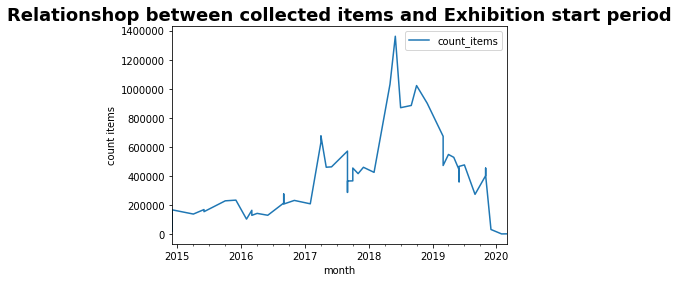

In [32]:
exhibition_item_collect.plot(x='created', y='count_items')
plt.title('Relationshop between collected items and Exhibition start period', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('count items')
plt.xlabel('month')
plt.legend()

# plt.savefig('monthly_exhibition_item_collect.png', dpi=300)
#####we cannot trust this cause the overlap! - i have to solve this. 

In [33]:
exhibition_item_collect.sort_values(by='count_items', ascending=False)

,id,title,created,date_end,count_items
19,1158846963,Color Decoded: The Textiles of Richard Landis,2018-06,2019-03,1361480
20,1108750009,Saturated: The Allure and Science of Color,2018-05,2019-03,1031058
16,2318794481,Rebeca Méndez Selects,2018-10,2019-06,1021788
15,2318794479,The Road Ahead: Reimagining Mobility,2018-12,2019-03,899925
17,2318794478,Process Lab: Scholten & Baijings,2018-09,2019-11,884831
18,1158829409,Iridescence,2018-07,2019-10,869440
31,420577501,Jeweled Splendors of the Art Deco Era: The Pri...,2017-04,2017-08,676058
14,2318797399,Katagami,2019-03,2019-10,672330
32,69117611,The Jazz Age: American Style in the 1920s,2017-04,2017-08,630360
28,1108731091,The Virtue in Vice,2017-09,2018-04,570483


## Exhibition and Activity 

In [69]:
exhibition


,id,url,title,text,date_start,date_end,is_active
0,2318802364,https://collection.cooperhewitt.org/exhibition...,Willi Smith: Street Couture,\r\nDuring his twenty-year career Willi Smith ...,2020-03-13,2020-12-30,1
1,2318802212,https://collection.cooperhewitt.org/exhibition...,Contemporary Muslim Fashions,Contemporary Muslim Fashions is the first majo...,2020-02-28,2020-12-30,1
2,1159161457,https://collection.cooperhewitt.org/exhibition...,Botanical Expressions,"\r\nAt the turn of the 20th century, the inter...",2019-12-07,2020-12-30,1
3,2318800172,https://collection.cooperhewitt.org/exhibition...,Herbert Bayer: Bauhaus Master,"Herbert Bayer (American, born Austria, active ...",2019-11-16,2020-12-30,1
4,1159161451,https://collection.cooperhewitt.org/exhibition...,After Icebergs,"In the summer of 1859, Frederic Edwin Church (...",2019-11-16,2020-12-30,1
5,2318800145,https://collection.cooperhewitt.org/exhibition...,Nature by Design: Cochineal,"American cochineal [Dactylopius coccus], a sma...",2019-11-16,2020-12-30,1
6,2318800018,https://collection.cooperhewitt.org/exhibition...,Face Values: Exploring Artificial Intelligence,Computers now complete many tasks that formerl...,2019-09-20,2020-12-30,1
7,2318799994,https://collection.cooperhewitt.org/exhibition...,Collection Selects: Wyss Institute,The Wyss Institute for Biologically Inspired E...,2019-07-12,2020-12-30,1
8,1159161445,https://collection.cooperhewitt.org/exhibition...,Plastics,\r\nNature By Design: Plastics\r\n\r\nFrom mol...,2019-06-08,2020-12-30,1
9,1159161455,https://collection.cooperhewitt.org/exhibition...,Botanical Lessons,\r\nBotanical Lessons explores the 19th-centur...,2019-06-08,2020-12-30,0


In [138]:
def exhibition_again(oneactivity):
    start = oneactivity >= exhibition['date_start']
    end =  oneactivity <= exhibition['date_end']
    return list(exhibition[start & end]['title'])
    
    
results = pensActivity['created'].apply(exhibition_again)


In [139]:
pensActivity['exhibition_info'] = results

In [140]:
pensActivity
##i need to to group the count by month 

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items,new,exhibition_info
131729,1509709,5,25d0ca6227e881c0f38c088d9f424737ec2773e1,"{""collection"":[{""record_id"":1,""record_data"":""c...",NaN,1,2014-12-15 15:32:19,2014-12-15 15:32:19,0,2,None,"[Hewitt Sisters Collect, Making Design, Passio..."
628374,1509661,1509681,b4737a3d142bb06f6d70dd02bd64f6a956792e59,"{""pen_uid"":""91ff826f0b001e00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:52:19,2014-12-15 15:52:19,0,7,None,"[Hewitt Sisters Collect, Making Design, Passio..."
473963,1509705,1509673,8810c7196f7f12237868251ff4b34ffe1e2a6d99,"{""pen_uid"":""90ff826f0a001d00"",""initial_time_st...",Insufficient permissions for object at index 3,0,2014-12-15 15:56:09,2014-12-15 15:56:09,0,5,None,"[Hewitt Sisters Collect, Making Design, Passio..."
771570,1509665,1509677,dd7a1ecaf59145b51fb13110598a99be48cc88ff,"{""pen_uid"":""91ff826f08001b00"",""initial_time_st...",Insufficient permissions for object at index 1,0,2014-12-15 15:56:30,2014-12-15 18:11:49,0,6,None,"[Hewitt Sisters Collect, Making Design, Passio..."
760275,1509687,1509683,da4055c2974155441bc26679ea37d9d57421a4fc,"{""pen_uid"":""91ff826f22001600"",""initial_time_st...",Insufficient permissions for object at index 2,0,2014-12-15 15:58:11,2014-12-15 18:10:29,0,6,None,"[Hewitt Sisters Collect, Making Design, Passio..."
...,...,...,...,...,...,...,...,...,...,...,...,...
494124,132777683,1524473,8de20189e64f86c4f892b98ca7d30077b00b3874,"{""ticket_id"":""tzctj"",""registers"":""None"",""colle...",NaN,1,2020-07-02 20:22:39,2020-07-02 20:22:39,161,1,None,"[Willi Smith: Street Couture, Contemporary Mus..."
676664,132794701,1524473,c24003e782909cd4a8385fd84970943237aa605b,"{""ticket_id"":""gz65"",""registers"":""None"",""collec...",NaN,1,2020-07-06 17:42:37,2020-07-06 17:42:37,159,1,None,"[Willi Smith: Street Couture, Contemporary Mus..."
283113,132806719,1524473,513e424fc16895f97ae6e70e9bb74f9a58c59229,"{""ticket_id"":""56bs6"",""registers"":""None"",""colle...",NaN,1,2020-07-09 13:12:38,2020-07-09 13:12:38,172,1,None,"[Willi Smith: Street Couture, Contemporary Mus..."
595596,132806727,1524473,ab224c85d1194f9136c2903b41c6f56a34d7875b,"{""ticket_id"":""cvszd"",""registers"":""None"",""colle...",NaN,1,2020-07-09 13:16:52,2020-07-09 13:16:52,122,1,None,"[Willi Smith: Street Couture, Contemporary Mus..."
